In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# PCA is a process of figuring out most important features or pricipal components that has the most impact on the target variable
df = pd.read_excel(r'C:\Users\Guo Beiting\Downloads\Dry_Bean_Dataset.xlsx')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


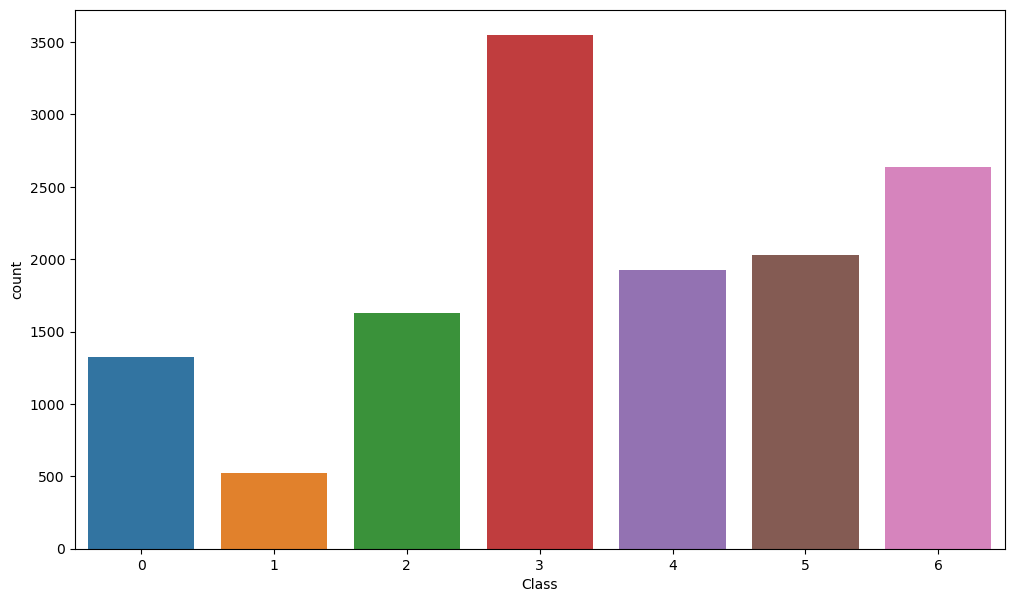

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=df)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

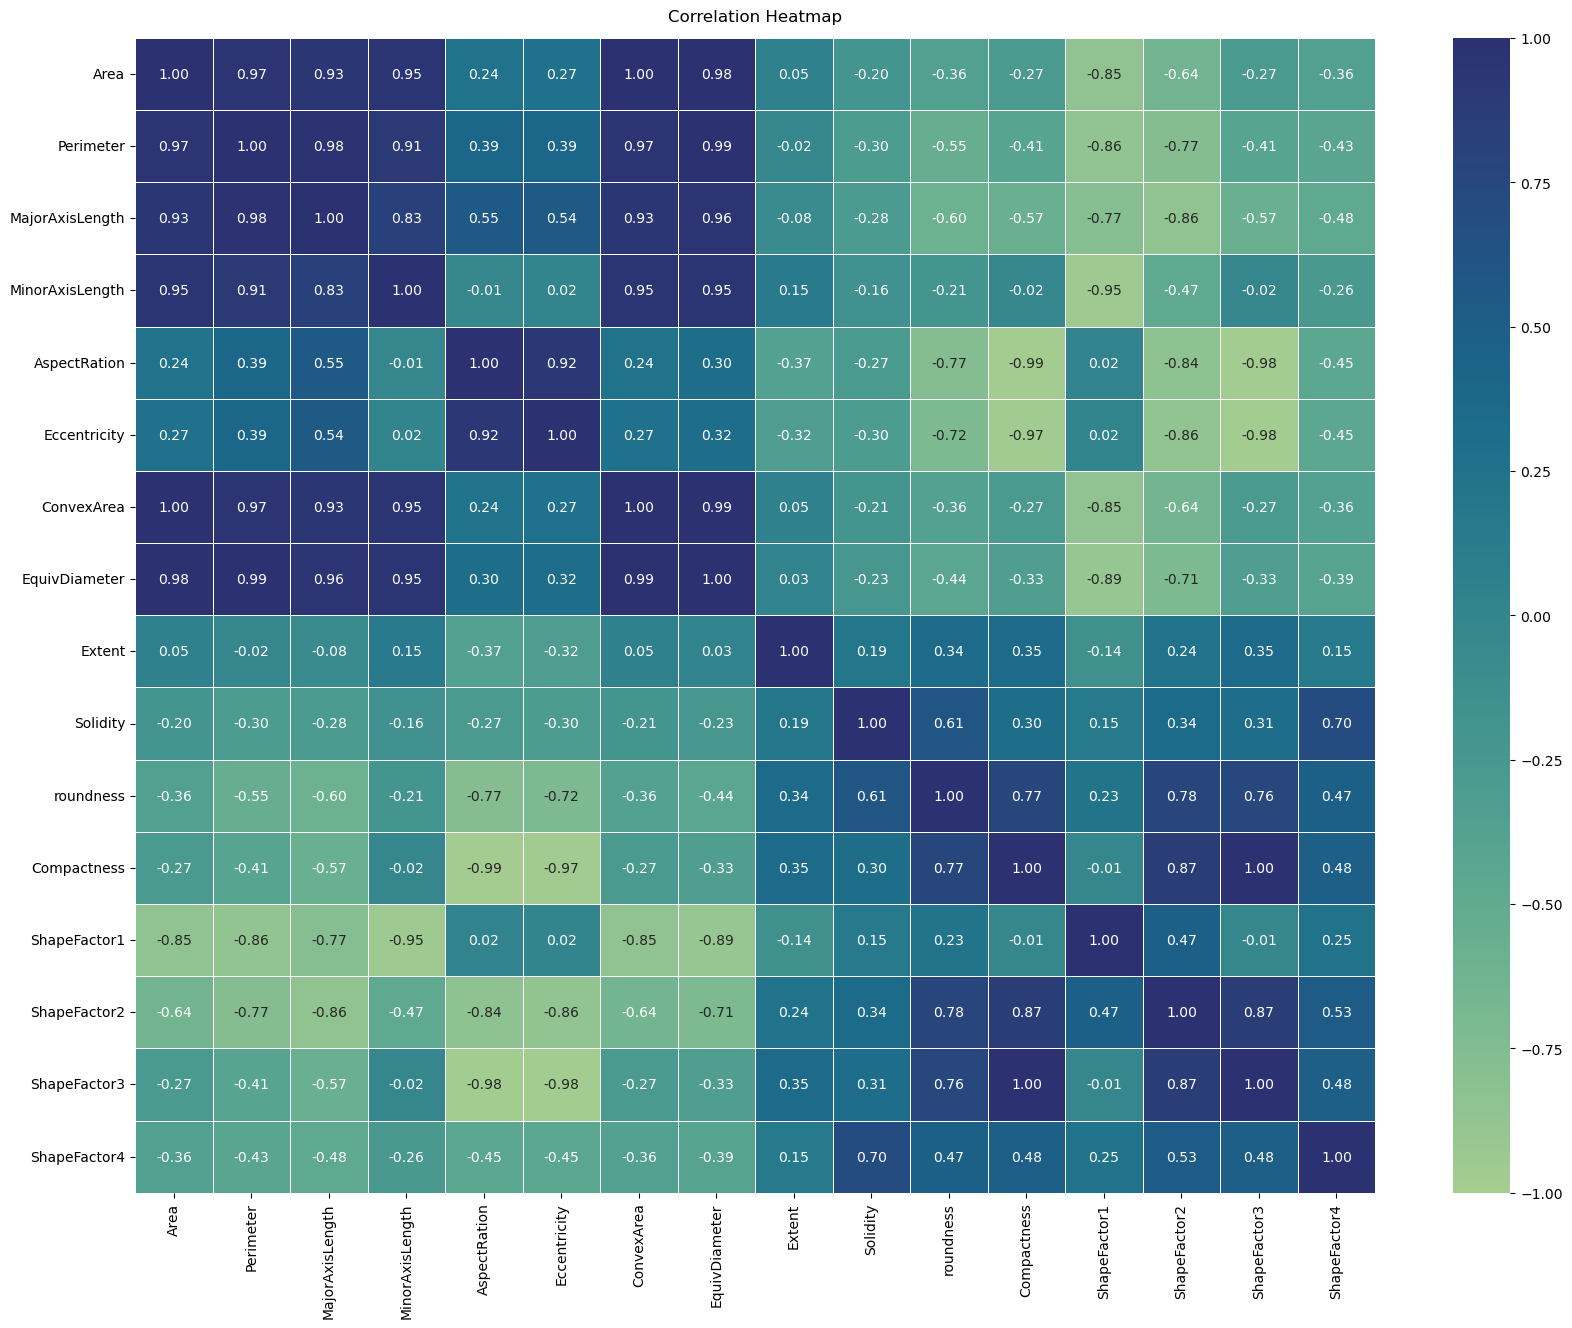

In [10]:
# Correlation Heatmap
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df.drop(['Class'], axis=1).corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [3]:
# Feature Engineering
# Label Encoding: "Class" column is str so we need to convert the labels into a numeric form.
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

In [4]:
X = df.drop(columns='Class')
y = df['Class']
y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int32

In [5]:
#Splitting Data Into Train and Test Subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

[0.06374535 0.07574285 0.07237014 0.0749402  0.07229703 0.07062112
 0.06495513 0.07158578 0.01429831 0.01806744 0.06053496 0.07574012
 0.08220288 0.07037449 0.08486528 0.02765892]


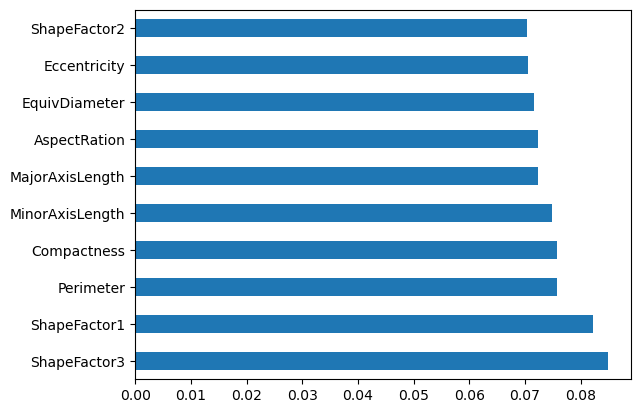

In [6]:
# Calculating Feature Importance
model = ExtraTreesClassifier(n_estimators=500, random_state=42)
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [7]:
#Standarizing Features
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


In [13]:
from sklearn.decomposition import PCA
#Principal axes in feature space, representing the directions of maximum variance in the data. 
# components axes that max the variance
# new axes to max the variance # unsupervised
components = 4
train_pca = PCA(n_components=components)
train_pca.fit(X_train_scaled)
x_pca = train_pca.transform(X_train_scaled)
X_train_scaled  = X_train_scaled @ train_pca.components_.T
X_test_scaled = X_test_scaled @ train_pca.components_.T
X_train_scaled

array([[-2.55034535, -1.37895747,  0.47465585, -0.94362299],
       [-0.98688053, -0.96181874,  0.93248215, -0.79096421],
       [-3.31400357,  0.29035194,  0.43817333, -0.54188587],
       ...,
       [ 3.96382603,  0.92745951, -1.58170786,  0.68732643],
       [-3.44695477,  2.13938265,  0.11388343, -0.63136161],
       [ 3.22134865, -2.25216607, -0.67296752, -1.88854006]])

In [14]:
forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)

In [15]:
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy: 0.88432
              precision    recall  f1-score   support

    BARBUNYA       0.77      0.66      0.71       261
      BOMBAY       0.98      0.99      0.99       117
        CALI       0.77      0.85      0.81       317
    DERMASON       0.90      0.91      0.91       671
       HOROZ       0.97      0.94      0.96       408
       SEKER       0.97      0.93      0.95       413
        SIRA       0.84      0.87      0.86       536

    accuracy                           0.88      2723
   macro avg       0.89      0.88      0.88      2723
weighted avg       0.89      0.88      0.88      2723



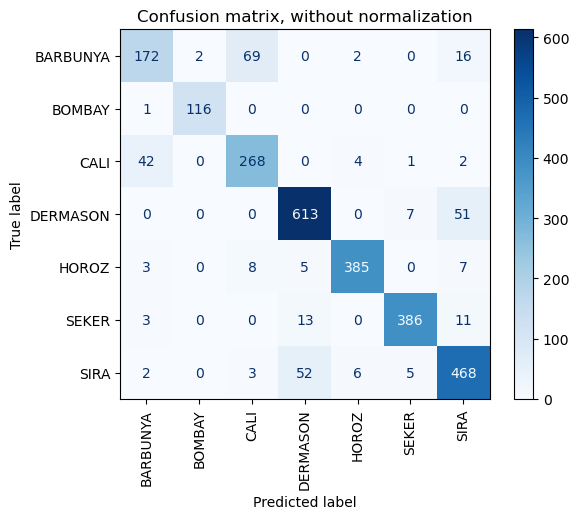

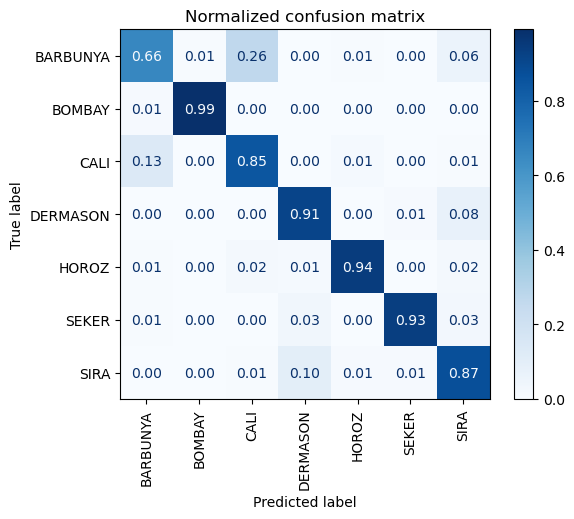

In [16]:
titles_options = [
    ("Confusion matrix, without normalization", None,'.0f'),
    ("Normalized confusion matrix", "true", '.2f'),
]
for title, normalize, values_format in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        forest,
        X_test_scaled,
        y_test,
        display_labels=np.unique(labelencoder.inverse_transform(y)),
        cmap=plt.cm.Blues,
        normalize=normalize,
        xticks_rotation='vertical',
        values_format= values_format
    )
    disp.ax_.set_title(title)
    
plt.show()

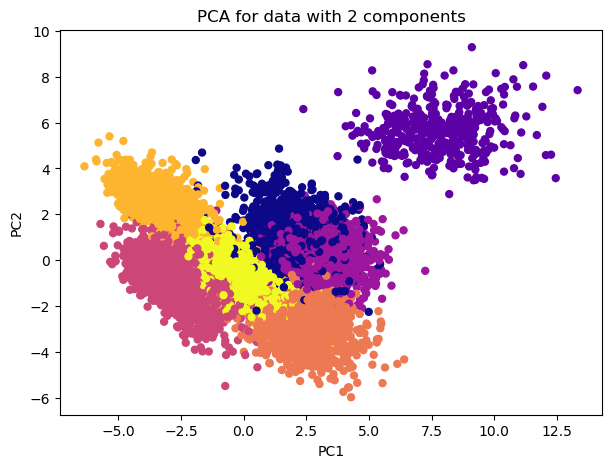

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7, 5])

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=25, cmap='plasma')
plt.title('PCA for data with 2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig("PCA.png")

In [113]:
df_comp = pd.DataFrame(train_pca.components_,columns=list(X_train.columns.values))

<AxesSubplot: >

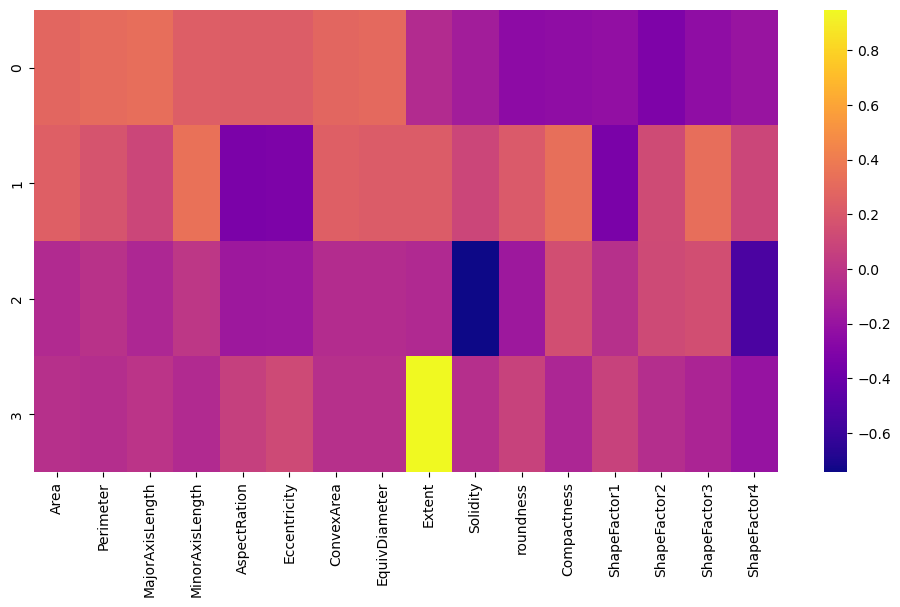

In [114]:
#This heatmap and the color bar basically represent the correlation between the various feature 
#and the principal component itself.
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

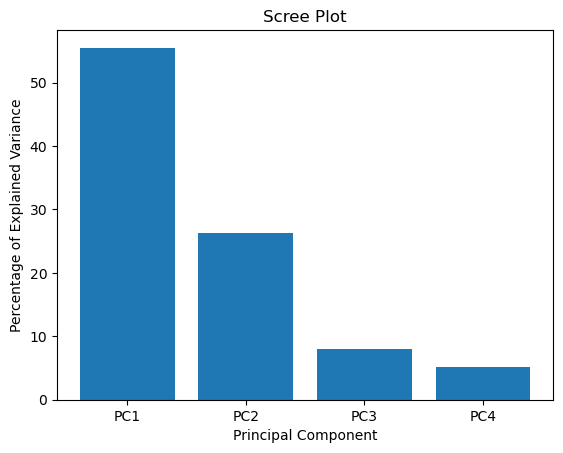

In [115]:
#The following code constructs the Scree plot
# 22.2% the variation is along the first PC, so a 2-D graph, using PC1-PC4 should do a good job representing the original data 
per_var = np.round(train_pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [122]:
#########################
#
# Determine which feature had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(train_pca.components_[0], index=X_train.columns.values)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10 = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10])

MajorAxisLength    0.325777
ShapeFactor2      -0.314567
Perimeter          0.310912
EquivDiameter      0.297578
ConvexArea         0.283448
Area               0.282708
roundness         -0.247887
ShapeFactor3      -0.239310
Compactness       -0.238764
MinorAxisLength    0.236042
dtype: float64


In [161]:
print(X_train_scaled)
y_train

              0         1         2         3
0     -2.550345 -1.378957  0.474656 -0.943623
1     -0.986881 -0.961819  0.932482 -0.790964
2     -3.314004  0.290352  0.438173 -0.541886
3     -2.405627 -0.022574 -0.232188  0.635419
4     -2.573948  0.619082 -0.084790  0.512682
...         ...       ...       ...       ...
10883  3.788101  0.237737 -1.655472  1.077451
10884 -0.883593 -1.104323 -0.332919 -1.030463
10885  3.963826  0.927460 -1.581708  0.687326
10886 -3.446955  2.139383  0.113883 -0.631362
10887  3.221349 -2.252166 -0.672968 -1.888540

[10888 rows x 4 columns]


,Class
0,3
1,3
2,3
3,3
4,5
...,...
10883,2
10884,3
10885,2
10886,5
